# K-medias (K-means)
El K-means es un método de Clustering que separa ‘K’ grupos de objetos (Clusters) de similar varianza, minimizando un concepto conocido como inercia, que es la suma de las distancias al cuadrado de cada objeto del Cluster a un punto ‘μ’ conocido como Centroide (punto medio de todos los objetos del Cluster).

El funcionamiento de este algoritmo comienza eligiendo un centroide para cada uno de los ‘K’ Clusters. El método de elección de estos centroides puede ser cualquiera; siendo los dos más comunes, el inicializarlo de forma aleatoria o el de elegir ‘K’ objetos del data set, bien sea de forma aleatoria o haciendo un pre-procesamiento de los datos. Lo recomendable sería la segunda opción e inicializar estos Clusters con objetos del data set. Una vez inicializados los centroides, el algoritmo continua alternando los dos siguientes pasos (asignación y actualización) de forma iterativa hasta que los centroides converjan.

Algunos casos de uso son:

Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
Categorización de Inventario: agrupar productos por actividad en sus ventas
Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

Las “features” o características que utilizaremos como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos (por ej. Hombre/Mujer o Ciencia Ficción, Terror, Novela,etc) se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real” -como en el caso de géneros de película o libros-. Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. No conviene utilizar features que estén correlacionados o que sean escalares de otros. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Como ejemplo utilizaremos de entradas un conjunto de datos en el que se analizaban rasgos de la personalidad de usuarios de Twitter. Se han filtrado a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc.

Tendemos como características de entrada:

usuario (el nombre en Twitter)
“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
“co” =Conscientiousness – grado de orden, prolijidad, organización
“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
“ag” = Agreeableness – grado de empatía con los demás, temperamento
“ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
Wordcount – Cantidad promedio de palabras usadas en sus tweets
Categoria – Actividad laboral del usuario (actor, cantante, etc.).

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. Si bien tenemos 8 columnas de entrada, sólo utilizaremos 3 en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos. Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). Pues veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.

In [16]:
dataframe = pd.read_csv("http://www.aprendemachinelearning.com/wp-content/uploads/2018/03/analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

Actor/actriz
Cantante
Modelo
Tv, series
Radio
Tecnología
Deportes
Politica
Escritor

In [17]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

Actor/actriz
Cantante
Modelo
Tv, series
Radio
Tecnología
Deportes
Politica
Escritor

In [4]:
#Conteo por categoria
print(df.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


## Ejercicio
Hacer visualización y análisis descriptivo

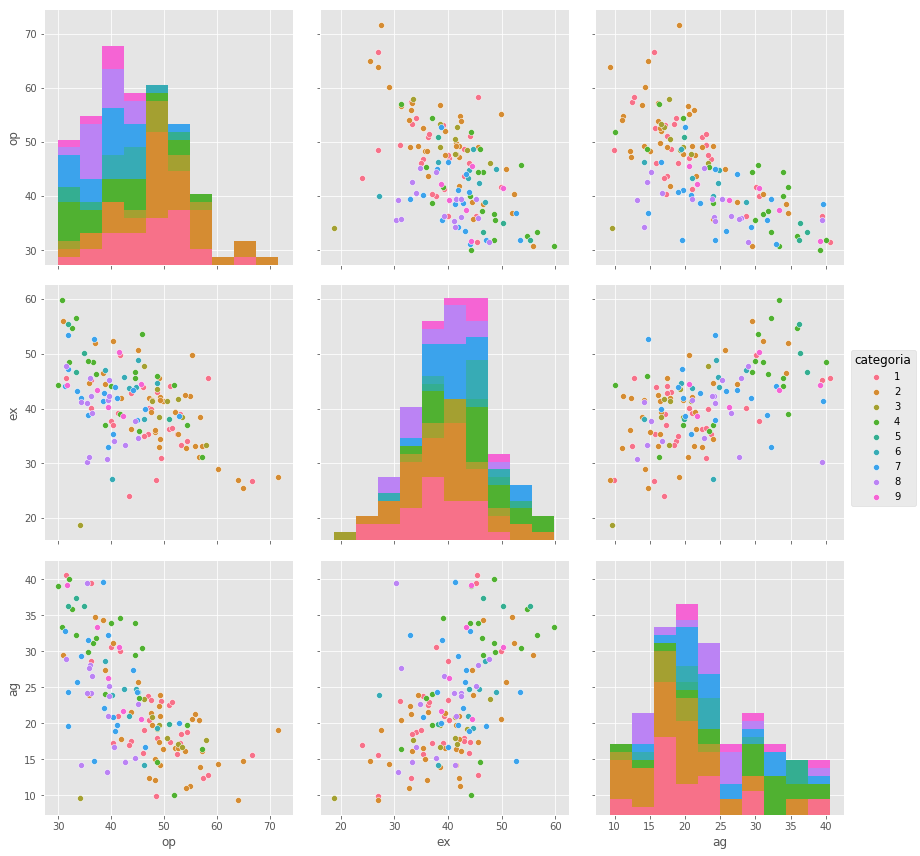

In [5]:
sb.pairplot(df.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

In [18]:
#Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [20]:
figf  = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

<Figure size 432x288 with 0 Axes>

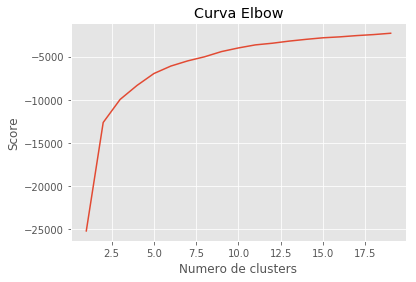

In [22]:
# Obtener valor de K

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Curva Elbow')
plt.show()

In [23]:
#Ejecutar K-means para k=5 
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 42.40604536  32.90654277  21.94949986]
 [ 58.58657531  31.02839375  15.6120435 ]
 [ 49.99285115  40.87133549  17.47411785]
 [ 39.30015109  43.66323625  24.20647012]
 [ 35.8763031   48.7473571   33.96090838]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

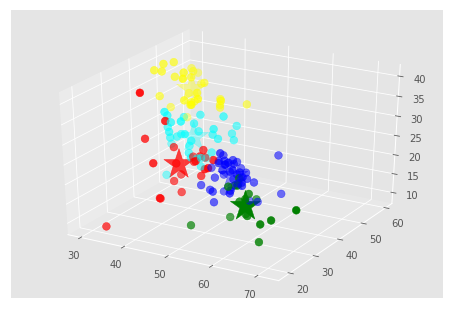

In [24]:
# Predecir los clusters
labels = kmeans.predict(X)
# Obtener los centros de los cluster
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

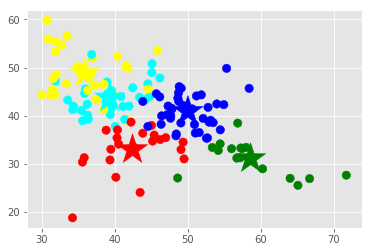

In [25]:
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

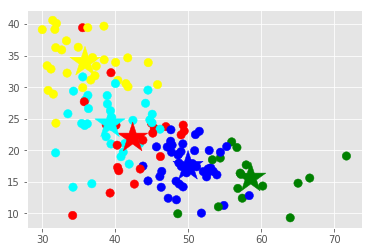

In [26]:
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

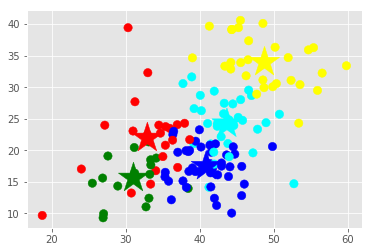

In [27]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [28]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,22
1,green,16
2,blue,41
3,cyan,32
4,yellow,29


Y podemos ver la diversidad en rubros laborales de cada uno.

In [29]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,6.0
9,9,1.0


Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [30]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([120,  82,  21,  64,  35])

In [31]:
users=df['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
JudgeJudy
carmenelectra
ierrejon
DaniMateoAgain


In [32]:
X_new  = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
